In [108]:
import pandas 
df = pandas.read_csv("train.csv")
df.head()
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


[-0.3593249  -0.3593249  -0.3593249  ... -0.3593249   1.47378925
 -0.3593249 ]
[208.5   181.5   223.5   ... 266.5   142.125 147.5  ]


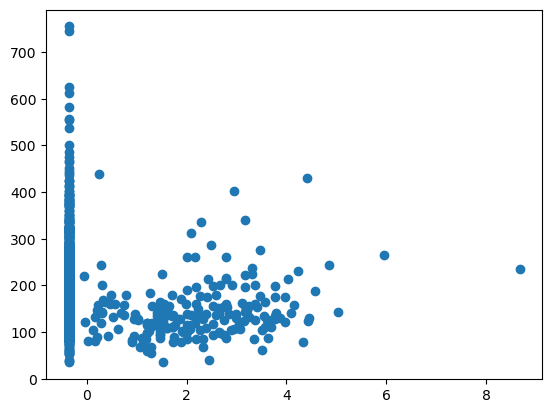

In [109]:
import numpy as np
x = df["EnclosedPorch"].to_numpy()
x = (x - np.mean(x)) / np.std(x)

y = df["SalePrice"].to_numpy() / 1000
print(x)
print(y)
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()



In [110]:
# y = ax + b 
import numpy as np
def loss(y_true: np.ndarray, y_pred: np.ndarray):
    return np.mean((y_true - y_pred) ** 2)



epoch: 0, loss: 37546.7354
epoch: 1, loss: 37534.1990
epoch: 2, loss: 37521.6676
epoch: 3, loss: 37509.1412
epoch: 4, loss: 37496.6198
epoch: 5, loss: 37484.1034
epoch: 6, loss: 37471.5920
epoch: 7, loss: 37459.0856
epoch: 8, loss: 37446.5843
epoch: 9, loss: 37434.0879
epoch: 10, loss: 37421.5965
epoch: 11, loss: 37409.1101
epoch: 12, loss: 37396.6287
epoch: 13, loss: 37384.1523
epoch: 14, loss: 37371.6809
epoch: 15, loss: 37359.2145
epoch: 16, loss: 37346.7531
epoch: 17, loss: 37334.2966
epoch: 18, loss: 37321.8452
epoch: 19, loss: 37309.3987
epoch: 20, loss: 37296.9572
epoch: 21, loss: 37284.5207
epoch: 22, loss: 37272.0891
epoch: 23, loss: 37259.6625
epoch: 24, loss: 37247.2409
epoch: 25, loss: 37234.8243
epoch: 26, loss: 37222.4126
epoch: 27, loss: 37210.0059
epoch: 28, loss: 37197.6041
epoch: 29, loss: 37185.2073
epoch: 30, loss: 37172.8155
epoch: 31, loss: 37160.4286
epoch: 32, loss: 37148.0467
epoch: 33, loss: 37135.6697
epoch: 34, loss: 37123.2977
epoch: 35, loss: 37110.9306
ep

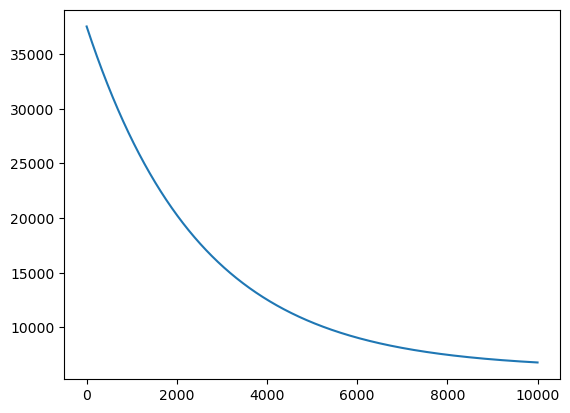

In [111]:
import math
def f(x, w, b):
    return w * x + b 
def dao_ham(x, w, b):
    esilon = 1e-6
    return (f(x + esilon, w, b) - f(x, w, b)) / esilon

def gradient(lr: float, x: np.ndarray, y_true: np.ndarray, epochs: int):
    w = 10
    b = 5
    n = len(x)
    loss_history = []
    for epoch in range(epochs):
        dw = 2 / n * np.sum(x * (w * x + b - y_true))
        db = 2 / n * np.sum(w * x + b - y_true)
        w = w - lr * dw
        b = b - lr * db
        y_pred = w * x + b
        l = loss(y_true, y_pred)    
        print(f"epoch: {epoch}, loss: {l:.4f}")
        loss_history.append(l)
    return w, b, loss_history
# def gradient(lr: float, x: np.ndarray, y_true: np.ndarray, epochs: int):
#     w = 10
#     b = 5
#     n = len(x)
#     loss_history = []
#     for epoch in range(epochs):
#         dw = 2 / n * np.sum(x * (w * x + b - y_true))
#         db = 2 / n * np.sum(w * x + b - y_true)
#         w = w - lr * dw
#         b = b - lr * db
#         y_pred = w * x + b
#         l = loss(y_true, y_pred)    
#         print(f"epoch: {epoch}, loss: {l}")
#         loss_history.append(l)
#     return w, b, loss_history

lr = 0.0001
epochs = 10000
w, b, loss_history = gradient(lr, x, y, epochs)
print(w, b)
plt.plot(loss_history)
plt.show()


In [112]:
# test 
df_test = pandas.read_csv("test.csv")

x_test = df_test["EnclosedPorch"].to_numpy()
x_test = (x_test - np.mean(x_test)) / np.std(x_test)
y_test = df_test["SalePrice"].to_numpy() / 1000

y_pred = f(x_test, w, b)

error = loss(y_test, y_pred)
print(f"error: {error:.4f}")

# plot
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.show()

KeyError: 'SalePrice'

In [ ]:
import pandas  as pd 
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
x = df[["area", "bedrooms", "bathrooms", "stories", "parking"]].to_numpy()
x.shape

(545, 5)

In [ ]:
y = df["price"].to_numpy()
y.shape


(545,)

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168,), (292,), (1168,), (292,))

In [ ]:
bias = np.ones((x_train.shape[0], 1))
print(bias.shape)
x_train = np.concatenate((bias, x_train), axis=1)
x_train.shape



(436, 1)


(436, 11)